<a href="https://colab.research.google.com/github/sadaqatali1234/Deep-learning-assigments/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
# google drive mounting
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# libaries importing
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import os
from os.path import join
import cv2
import pandas as pd


In [3]:
#data loading
data = "/content/drive/MyDrive/flowers/flowers"

# List out the directories inside the main input folder

folders = os.listdir(data)

print(folders)

['rose', 'sunflower', 'tulip', 'daisy', 'dandelion']


In [4]:
# pictures loading and resizing
image_names = []
labels = []
data_images = []


size = 28,28

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            data_images.append(im)
        else:
            continue

In [5]:
# check length labels of pic
len(labels)

4323

In [6]:
#check image length 
len(data_images)

4323

In [7]:
# label encoding
label_dummies = pd.get_dummies(labels)

labels =  label_dummies.values.argmax(1)

In [8]:
# labels unique values
pd.unique(labels)

array([2, 3, 4, 0, 1])

In [9]:
# convet label and data into numpy array
labels=np.asarray(labels).astype("float32")
data = np.asarray(data_images).astype("float32")/255.0

In [10]:
# lenght of images
len(image_names)

4323

In [11]:
# length of label
len(labels)

4323

In [12]:
# shape of image and label
print(f"Shape of images is :{data.shape}")
print(f"Shape of labels is :{labels.shape}")


Shape of images is :(4323, 28, 28, 3)
Shape of labels is :(4323,)


In [13]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.40,random_state=1)

In [14]:
#shape of training data & testing data
print(f"Shape of training data is:{X_train.shape}\nShape of testing data is :{X_test.shape}")

Shape of training data is:(2593, 28, 28, 3)
Shape of testing data is :(1730, 28, 28, 3)


In [15]:
#shape of training & testing label
print(f"Shape of training labels is:{y_train.shape}\nShape of testing labels is :{y_test.shape}")

Shape of training labels is:(2593,)
Shape of testing labels is :(1730,)


In [16]:
# Check first image of Training data
X_train[0]

array([[[0.26666668, 0.52156866, 0.43529412],
        [0.29803923, 0.52156866, 0.4627451 ],
        [0.21176471, 0.4392157 , 0.4117647 ],
        ...,
        [0.08235294, 0.5137255 , 0.45490196],
        [0.10196079, 0.47843137, 0.3882353 ],
        [0.06666667, 0.38039216, 0.3137255 ]],

       [[0.52156866, 0.5019608 , 0.48235294],
        [0.7921569 , 0.8784314 , 0.8784314 ],
        [0.7372549 , 0.83137256, 0.8       ],
        ...,
        [0.08235294, 0.21960784, 0.18431373],
        [0.11764706, 0.25490198, 0.24705882],
        [0.05882353, 0.3254902 , 0.26666668]],

       [[0.3019608 , 0.45490196, 0.3764706 ],
        [0.79607844, 0.81960785, 0.79607844],
        [0.18039216, 0.5921569 , 0.52156866],
        ...,
        [0.47843137, 0.5137255 , 0.4745098 ],
        [0.04705882, 0.3137255 , 0.24313726],
        [0.1254902 , 0.29411766, 0.25882354]],

       ...,

       [[0.03921569, 0.5058824 , 0.3372549 ],
        [0.13725491, 0.50980395, 0.3529412 ],
        [0.11372549, 0

In [17]:
#check first labels of training image
y_train[0]

4.0

In [18]:
# model buiding
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

network =Sequential()
network.add(Conv2D(8, (1,1),input_shape=(28, 28, 3),activation='relu'))
network.add(MaxPool2D(pool_size=(1,1)))
network.add(Conv2D(16, (1,1),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(128,activation='relu'))
network.add(Dense(10,activation="softmax"))


In [19]:
#model summary
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [20]:
#model compiling
network.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
batch_size = 1
epochs = 20
history=network.fit(X_train, y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/20
2593/2593 [==============================] - 8s 2ms/step - loss: 1.4400 - accuracy: 0.3899
Epoch 2/20
2593/2593 [==============================] - 5s 2ms/step - loss: 1.0166 - accuracy: 0.6047
Epoch 3/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.8795 - accuracy: 0.6665
Epoch 4/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.7689 - accuracy: 0.7097
Epoch 5/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.6372 - accuracy: 0.7553
Epoch 6/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.5496 - accuracy: 0.8050
Epoch 7/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.4608 - accuracy: 0.8333
Epoch 8/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.3694 - accuracy: 0.8609
Epoch 9/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.3124 - accuracy: 0.8885
Epoch 10/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.213

In [22]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

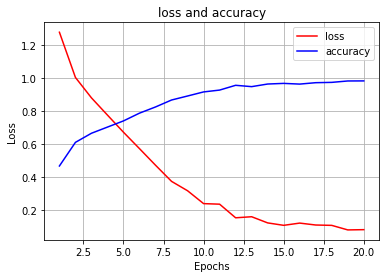

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_accuracy = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='loss')
plt.plot(epochs, val_accuracy, 'b', label='accuracy')
plt.title('loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [24]:
network.evaluate(X_test,y_test)

55/55 [==============================] - 0s 3ms/step - loss: 2.4021 - accuracy: 0.6110


[2.4021308422088623, 0.6109826564788818]

In [25]:
pred = network.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

1 ==> 1.0
1 ==> 3.0
0 ==> 0.0
4 ==> 4.0
4 ==> 4.0
0 ==> 0.0
3 ==> 4.0
1 ==> 1.0
2 ==> 4.0
1 ==> 4.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


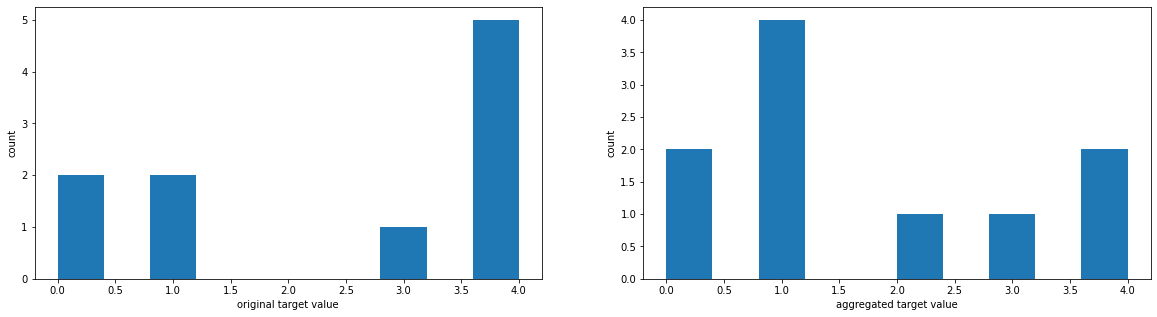

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test[:10])
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()